In [140]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [142]:
with open('../results/2022-10-16_19-12-17_results.json') as f:
    data = json.load(f)

In [143]:
loss0 = (data[0]['results']['total']['training_losses'][0])
total = 0
for i in range(len(loss0) - 1):
    if loss0[i+1] > loss0[i]:
        total += 1
print(total)

1183


In [144]:
for d in data:
    print(configs)
    results = d['results']
    configs = d['configs']
    
    r2 = results['total']['r2score_val']
    print('{0:.4}'.format(np.mean(r2)) + '\\pm {0:.3}'.format(np.std(r2)))

{'depth': 6, 'optimizer': 'ADAM', 'n_folds': 5, 'loss_function': 'mse', 'n_epochs': 2500, 'width': 100, 'batchsize': 1024}
0.9789\pm 0.000299
{'depth': 6, 'optimizer': 'ADAM', 'n_folds': 5, 'loss_function': 'mse', 'n_epochs': 2500, 'width': 100, 'batchsize': 1024}
0.9703\pm 0.000771
{'depth': 6, 'optimizer': 'ADAM', 'n_folds': 5, 'loss_function': 'mse', 'n_epochs': 2500, 'width': 150, 'batchsize': 1024}
0.962\pm 0.000516


In [145]:
def getinfo(obj):
    infotoformat = {4: {}, 5: {}, 6: {}}
    for d in data:
        results = d['results']
        configs = d['configs']

        r2 = results['by_response'][obj]['r2score_val']

        infotoformat[
            configs['depth']
        ][configs['width']] = '${0:.4}'.format(np.mean(r2)) + '\\pm {0:.3}$'.format(np.std(r2))
    
    return infotoformat

In [146]:
def formatinfo(vals, obj):
    print('''
        \\begin{table*}[htp!]
        \centering
         \\begin{tabular}{|c |c c c|} 
         \hline
         & Depth 4 & Depth 5 & Depth 6 \\\\
         \hline
         Width 50 & %s & %s & %s \\\\
         Width 75 & %s & %s & %s \\\\
         Width 100 & %s & %s & %s \\\\
         \hline
         \end{tabular}
         \caption{\label{tab:valr2}Aggregated validation set $R^2$ scores.}
        \end{table*}
    ''' % tuple(vals[depth][width] for depth in [4, 5, 6] for width in [50, 75, 100]))

In [147]:
def maketable(obj):
    vals = getinfo(obj)
    formatinfo(vals, obj)

In [148]:
for i in [1, 2, 3, 4, 5, 6]:
    maketable(f'OBJ{i}')

KeyError: 50

In [149]:
tuple(infotoformat[depth][width] for depth in [4, 5, 6] for width in [50, 75, 100])

('$0.9941\\pm 0.000556$',
 '$0.9957\\pm 0.000315$',
 '$0.9958\\pm 0.000167$',
 '$0.9946\\pm 0.000288$',
 '$0.9956\\pm 0.000284$',
 '$0.9958\\pm 0.000277$',
 '$0.994\\pm 0.000163$',
 '$0.9956\\pm 0.000668$',
 '$0.9955\\pm 0.000263$')

In [152]:
def compute_color(depth, width, alpha=1.):
    orange = (0.8, 0.3, 0.1)
    green = (0.4, 0.8, 0.4)
    blue = (0.1, 0.2, 0.8)
    #purple = (0.4, 0.1, 0.3)
    
    if width == 100:
        main = orange
    if width == 150:
        main = green
    if width == 200:
        main = blue
    return (*main, alpha*(.32*(depth-6)+0.85))

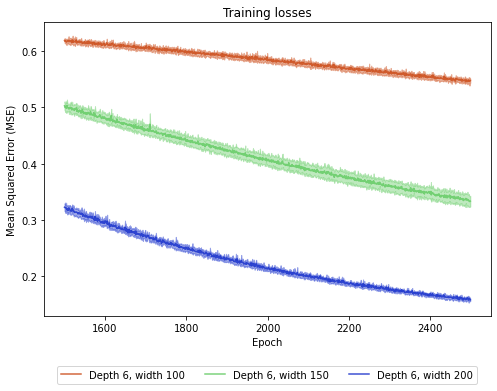

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
epochs = list(range(1500, 2500))

for d in data:
    depth = d['configs']['depth']
    width = d['configs']['width']
    losses = d['results']['total']['training_losses']
    means = np.mean(losses, axis=0)[-1000:]
    ax.plot(
        epochs, np.mean(d['results']['total']['training_losses'], axis=0)[-1000:],
        color=compute_color(depth, width),
        label=f'Depth {depth}, width {width}'
    )
    stds = np.std(losses, axis=0)[-1000:]
    ax.fill_between(epochs, means-stds, means+stds, color=compute_color(depth, width, alpha=0.5), edgecolor="none")
    
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error (MSE)')
plt.legend(bbox_to_anchor=(0.5,-.2), ncol=3, loc='center')
ax.set_title('Training losses')
plt.subplots_adjust(bottom=.2)
plt.savefig('training_losses.png', dpi=400)
plt.show()

In [158]:
# mapes
for d in data:
    configs = d['configs']
    print(configs)
    depth = configs['depth']; width = configs['width']
    
    results = d['results']
    for i in range(1, 7):
        print(f'OBJ{i}')
        obj_results = results['by_response'][f'OBJ{i}']
        print('train:', np.mean(obj_results['mape_train']))
        print('val:', np.mean(obj_results['mape_val']))

{'depth': 6, 'optimizer': 'ADAM', 'n_folds': 5, 'loss_function': 'mse', 'n_epochs': 2500, 'width': 100, 'batchsize': 1024}
OBJ1
train: 0.01493806156785149
val: 0.016606229366848576
OBJ2
train: 0.01729456485824126
val: 0.018258158585187544
OBJ3
train: 0.015261395105645037
val: 0.01576325630022268
OBJ4
train: 0.07526678806903372
val: 0.07686098285343568
OBJ5
train: 0.10648267808989527
val: 0.11764717800390338
OBJ6
train: 0.1071315276248779
val: 0.11755844116974727
{'depth': 6, 'optimizer': 'ADAM', 'n_folds': 5, 'loss_function': 'mse', 'n_epochs': 2500, 'width': 150, 'batchsize': 1024}
OBJ1
train: 0.015992110398945776
val: 0.02024997146397087
OBJ2
train: 0.014931905122599329
val: 0.019811919517402403
OBJ3
train: 0.01852666880823551
val: 0.020205185478777168
OBJ4
train: 0.08259609247766937
val: 0.0857359864258986
OBJ5
train: 0.07707847756731181
val: 0.1321508842471883
OBJ6
train: 0.07828834879840094
val: 0.1314507982121078
{'depth': 6, 'optimizer': 'ADAM', 'n_folds': 5, 'loss_function': 'm